In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [134]:
def get_mta_data(weeks):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    df_list = []
    for week in weeks:
        df_list.append(pd.read_csv(url.format(week)))
    return pd.concat(df_list)

In [135]:
mta_df = get_mta_data([170506, 170513, 170520, 170527])
#mta_df = get_mta_data([170506])

In [136]:
mta_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,REGULAR,6158521,2085589
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,00:00:00,REGULAR,6158637,2085612
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,04:00:00,REGULAR,6158654,2085617
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,08:00:00,REGULAR,6158661,2085641
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,12:00:00,REGULAR,6158703,2085730


In [137]:
def get_entries(mta_df):
    d = {}
    for row in mta_df.itertuples():
        station = row[4]
        entries = row[10]
        if station not in d:
            d[station] = [entries]
        else:
            d[station].append(entries)
    return d

In [138]:
d = get_entries(mta_df)
y = np.array(sorted(d['59 ST'], reverse=True))
x = np.arange(len(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


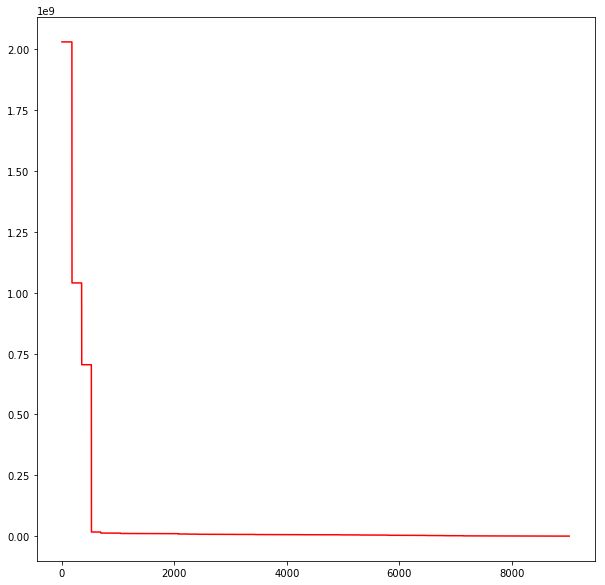

In [139]:
print(type(x), type(y))

plt.figure(figsize=(10,10))
#plt.xlim([125,200])
plt.plot(x,y,'r')

In [140]:
y[125:140]

array([2031020122, 2031019272, 2031018720, 2031017657, 2031017362,
       2031017317, 2031016653, 2031015879, 2031015349, 2031014596,
       2031014382, 2031014344, 2031014112, 2031013582, 2031013142])